In [1]:
import pandas as pd
import numpy
import numpy as np
import xlrd
from sklearn.utils import shuffle
import keras
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dense, Activation, Flatten
from keras.layers import Dropout
from collections import Counter
from keras.layers import GRU
import matplotlib.pyplot as plt
# fix random seed for reproducibility
numpy.random.seed(7)


Using TensorFlow backend.


In [2]:
df=pd.read_excel('40000 Egyptian tweets.xlsx')
df

,review,label
0,اكبر خطا ترتكبه ان تعامل الناس باخلاقك انت مش ...,negative
1,دائما اكره اخر ليله في كل مكان .,negative
2,يارب اللى يسرق تويتاتى يدخل النار .,negative
3,الاسراف فى تناول القهوة يسبب الوفاه .,negative
4,انا اتبهدلت من التراب النهارده. حاجة تقرف .,positive
5,فى بنات بتلبـس اكســسوارات لدرجــة انك تحــس ا...,negative
6,احتاج صديق حقيقى يواسينى ويخفف عنى .,positive
7,لازم اتعلم الثبات الانفعالى زيهم كدا .,positive
8,جروب الدفعه ليلة الامتحان دايما بتحس ان الناس ...,negative
9,النقاش هو الذى يؤدي الى نتيجه اما التعصب فيولد...,negative


In [3]:
df= shuffle(df)

In [4]:
df

,review,label
7669,وعليك والعائله الكريمه يا حبيبى .,positive
2261,صعب تحقق ليك اى هدف فى المخروبة دى .,negative
20571,قبل ان يجف قلبك اسقه بالقران.,positive
5426,الشربات الصوف دى جميلة اوى فى الشتاء .,positive
11130,يارب يا باشا .,positive
27723,عذرا لمن لا اعجبهم فمهارة المجاملة لا اتقنها .,positive
4617,يا شباب يا بنات انا عملت ليكم فولو . اعملوا ...,negative
19678,ما زال عندي امل ان فى هدية جاية ليا فجاة.,positive
5695,يحرق اللى بيحاول يستغبى وهو بيكلمك.,negative
16369,قرف مادة الكيمياء دى .,negative


In [5]:
# from Data frame to  Numpy array 
reviews= df.iloc[:,0]
labels =df.iloc[:,1]

In [6]:
reviews[1]

'دائما اكره اخر ليله في كل مكان   .  '

In [7]:
from string import punctuation 
reviews_processed = []
unlabeled_processed = [] 
x=['\n','\r']
for review in reviews:
    review_cool_one = ''.join([w for w in review if w not in punctuation])
    review_cool_one = ''.join([w for w in review if w not in x])

    reviews_processed.append(review_cool_one)

In [8]:
reviews_processed[1]

'صعب تحقق ليك اى هدف فى المخروبة دى .'

In [9]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
word_reviews = []
all_words = []
for review in reviews_processed:
    word_reviews.append(review.lower().split())
    for word in review.split():
        all_words.append(word.lower())
# counter for  Words Rep.    
counter = Counter(all_words)
vocab = sorted(counter, key=counter.get, reverse=True)
vocab_to_int = {word: i for i, word in enumerate(vocab, 1)}

In [11]:
vocab_to_int

{'.': 1,
 'من': 2,
 'في': 3,
 'و': 4,
 'انا': 5,
 'فى': 6,
 'مش': 7,
 'على': 8,
 'يا': 9,
 'كل': 10,
 'الله': 11,
 'ما': 12,
 'ده': 13,
 'لا': 14,
 'ان': 15,
 'اللي': 16,
 'اللى': 17,
 'بس': 18,
 'ربنا': 19,
 'لما': 20,
 'انت': 21,
 'حاجة': 22,
 'ايه': 23,
 'الناس': 24,
 'هو': 25,
 'دى': 26,
 'يارب': 27,
 'حد': 28,
 'علي': 29,
 'ولا': 30,
 'كدا': 31,
 'لو': 32,
 'عن': 33,
 'والله': 34,
 'اوى': 35,
 'مع': 36,
 'كان': 37,
 'ناس': 38,
 'يوم': 39,
 'انك': 40,
 'ليه': 41,
 'بقى': 42,
 'احنا': 43,
 'فيه': 44,
 'دي': 45,
 'الدنيا': 46,
 'علشان': 47,
 'غير': 48,
 'عشان': 49,
 'كنت': 50,
 '،': 51,
 'جدا': 52,
 'اوي': 53,
 'بعد': 54,
 'شاء': 55,
 'كتير': 56,
 'فيها': 57,
 'اني': 58,
 'عايز': 59,
 'وانا': 60,
 'الواحد': 61,
 'اللهم': 62,
 'لازم': 63,
 'نفسي': 64,
 'حاجه': 65,
 'خير': 66,
 'مصر': 67,
 'عارف': 68,
 'واحد': 69,
 'عليك': 70,
 'أن': 71,
 'مفيش': 72,
 'الا': 73,
 'هي': 74,
 'طول': 75,
 'كده': 76,
 'كله': 77,
 'النهارده': 78,
 'شوية': 79,
 'اكتر': 80,
 'بعض': 81,
 'عليه': 82,
 'حلوة': 8

In [12]:
reviews_to_ints = []
for review in word_reviews:
    reviews_to_ints.append([vocab_to_int[word] for word in review])

In [13]:
reviews_lens = Counter([len(x) for x in reviews_to_ints])
print('Zero-length {}'.format(reviews_lens[0]))
print("Max review length {}".format(max(reviews_lens)))

Zero-length 0
Max review length 40


In [14]:
reviews_to_ints

[[8927, 15260, 7424, 9, 863, 1],
 [302, 2692, 271, 107, 1240, 6, 11279, 26, 1],
 [102, 15, 24328, 201, 24329, 24330],
 [15261, 24331, 26, 187, 35, 6, 570, 1],
 [27, 9, 1012, 1],
 [5467, 509, 14, 15262, 24332, 6324, 14, 15263, 1],
 [9,
  824,
  9,
  439,
  5,
  401,
  887,
  1013,
  1,
  2879,
  144,
  5,
  121,
  1013,
  1,
  9,
  692,
  24333,
  24334,
  887,
  1,
  24335,
  24336,
  6325,
  7,
  31,
  147,
  1],
 [12, 3351, 136, 370, 15, 6, 787, 1935, 144, 15264],
 [1672, 17, 3640, 24337, 180, 24338],
 [1473, 738, 2526, 26, 1],
 [20,
  1241,
  69,
  1435,
  24339,
  553,
  652,
  1,
  24340,
  23,
  3641,
  25,
  1435,
  2,
  1436,
  4,
  24341,
  146,
  1,
  24342,
  24343,
  8928,
  11280,
  1],
 [1673, 367, 2693, 24344, 24345, 24346, 1, 9, 116, 12, 11281, 1],
 [1384, 26, 92, 6, 15265, 11282, 1],
 [7425,
  642,
  1,
  598,
  7426,
  15266,
  4,
  6326,
  1830,
  1014,
  179,
  15267,
  1,
  160,
  181,
  2,
  24347,
  180,
  3088,
  353,
  1],
 [609, 136, 15268, 3, 2527, 24348, 213

In [15]:
labels = np.array([1 if each == 'positive' else 0 for each in labels])

In [16]:
seq_len = 40

features = np.zeros((len(reviews_to_ints), seq_len), dtype=int)
for i, review in enumerate(reviews_to_ints):
    features[i, -len(review):] = np.array(review)[:seq_len]
    

In [17]:
X_train= features[:30000]
X_test= features[30000:]
y_train=labels[:30000]
y_test=labels[30000:]

In [29]:
print('X_trian shape {}'.format(X_train.shape))
print('X_test shape {}'.format(X_test.shape))

print('y_train shape {}'.format(y_train.shape))

print('y_test shape {}'.format(y_test.shape))



X_trian shape (30000, 40)
X_test shape (10000, 40)
y_train shape (30000,)
y_test shape (10000,)


In [30]:
X_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,  8927, 15259,
        7423,     9,   863,     1])

In [31]:
y_train

array([1, 0, 1, ..., 0, 0, 1])

In [0]:
# vocab size  top words 
# load the dataset but only keep the top n words, zero the rest
top_words = 100000 

# truncate and pad input sequences
max_review_length = 40

#one Hot Encoding Labels 
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)


In [33]:
X_test 

array([[    0,     0,     0, ...,  2219,   804,     1],
       [    0,     0,     0, ...,  1407,  5032,     1],
       [    0,     0,     0, ...,    48,  1240,     1],
       ...,
       [    0,     0,     0, ..., 61631, 61632,     1],
       [    0,     0,     0, ...,  2218,  1611,     1],
       [    0,     0,     0, ...,   812, 61633,     1]])

In [36]:
# create RCNN model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.7))
model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(0.8))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(200))
model.add(Dropout(0.8))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 32)            3200000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 40, 64)            6208      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 20, 64)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 64)            0         
____________________________________

In [37]:
history=model.fit(X_train, y_train, epochs=5, batch_size=256)





Epoch 1/5





30000/30000 [==============================] - 25s 829us/step - loss: 0.6930 - acc: 0.5073
Epoch 2/5
30000/30000 [==============================] - 22s 747us/step - loss: 0.6070 - acc: 0.6724
Epoch 3/5
30000/30000 [==============================] - 27s 887us/step - loss: 0.4015 - acc: 0.8256
Epoch 4/5
30000/30000 [==============================] - 23s 778us/step - loss: 0.2509 - acc: 0.9051
Epoch 5/5
30000/30000 [==============================] - 22s 733us/step - loss: 0.1739 - acc: 0.9372


In [38]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100)) 

Accuracy: 69.38%


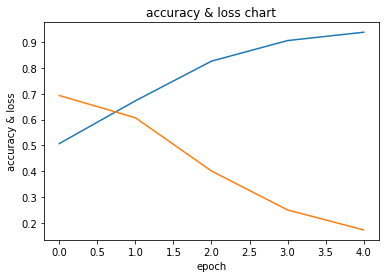

In [41]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])

plt.title("accuracy & loss chart")
plt.xlabel("epoch")
plt.ylabel("accuracy & loss")


plt.show()


In [42]:
# For Saving the model
model_yaml = model.to_yaml()
with open("Rania.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("Rania.h5")
print("Saved model to disk")


Saved model to disk
